In [27]:
# Manipulations standard
import geopandas as gpd
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# Pour la basemap
import contextily as cx
# Autres
import os
# Potentiel solaire package
from potentiel_solaire.constants import DATA_FOLDER

In [ ]:
# Executer ci dessous ci besoin pour récupérer les données
# !extract-sample-data
# Et pour sauver une version markdown des notebooks, utiliser
# jupyter nbconvert donnees_par_ecole.ipynb --to markdown --output-dir=exports/

# Etape 1: Ouverture des datasets

## Dataset : départements

/tmp/ipykernel_273337/2162312035.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
/tmp/ipykernel_273337/2162312035.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


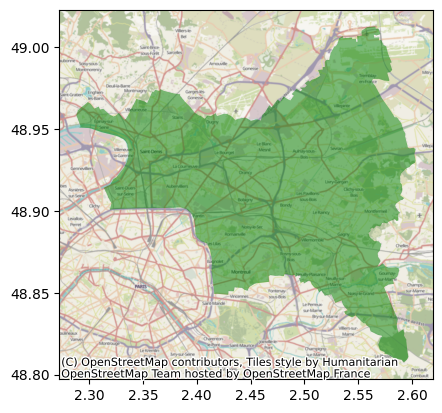

In [28]:
dpts = gpd.read_file(DATA_FOLDER / "contour-des-departements.geojson").to_crs(4326)
ShapeNT = dpts[dpts.code == "93"].geometry
fig, ax = plt.subplots()
dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Dataset : annuaire éducation / écoles

In [29]:
# Takes 58s on my laptop
annuaire = gpd.read_file(DATA_FOLDER / 'fr-en-annuaire-education.geojson')
print(len(annuaire),"items")
annuaire = annuaire[annuaire.code_postal.str.startswith("93")]
print(len(annuaire),"objets dans le 93")
annuaire = annuaire.to_crs(4326)
annuaire.head(3)

69641 items
1432 objets dans le 93


identifiant_de_l_etablissement  \
63                         0932595R   
8972                       0930145C   
8973                       0930150H   

                                      nom_etablissement type_etablissement  \
63    Ecole primaire La Roseraie - Jacqueline de Cha...              Ecole   
8972                   Ecole élémentaire Anatole France              Ecole   
8973                      Ecole élémentaire Victor Hugo              Ecole   

     statut_public_prive              adresse_1 adresse_2           adresse_3  \
63                Public           47 rue Pinel      None      93200 ST DENIS   
8972              Public  68 rue Anatole France      None  93120 LA COURNEUVE   
8973              Public      8 rue Jean Mermoz      None      93200 ST DENIS   

     code_postal code_commune   nom_commune  ... code_type_contrat_prive  \
63         93200        93066   Saint-Denis  ...                      99   
8972       93120        93027  La Courneuve  ...                      99   
8973       93200        93066   Saint-Denis  ...                      99   

          pial etablissement_mere  type_rattachement_etablissement_mere  \
63        None               None                                  None   
8972      None               None                                  None   
8973  0930587H               None                                  None   

      code_circonscription code_zone_animation_pedagogique  \
63                0932058G                            None   
8972              0931038Y                            None   
8973              0932609F                            None   

     libelle_zone_animation_pedagogique code_bassin_formation  \
63                                 None                  None   
8972                               None                  None   
8973                               None                  None   

     libelle_bassin_formation                  geometry  
63                       None  POINT (2.35905 48.93022)  
8972                     None  POINT (2.40338 48.92178)  
8973                     None  POINT (2.35446 48.94132)  

[3 rows x 73 columns]

## Dataset : BD TOPO

In [30]:
import fiona

Vérifions quelles sont les layers de dispo dans le gpkg

In [31]:
GPKG = DATA_FOLDER / "BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg"
layers = fiona.listlayers(GPKG)
print(" ".join(layers))

troncon_de_route route_numerotee_ou_nommee itineraire_autre troncon_de_voie_ferree equipement_de_transport piste_d_aerodrome aerodrome point_de_repere non_communication point_du_reseau voie_ferree_nommee toponymie_transport batiment cimetiere construction_lineaire construction_ponctuelle construction_surfacique reservoir ligne_orographique pylone terrain_de_sport toponymie_bati cours_d_eau troncon_hydrographique bassin_versant_topographique plan_d_eau surface_hydrographique noeud_hydrographique detail_hydrographique toponymie_hydrographie zone_d_habitation lieu_dit_non_habite detail_orographique toponymie_lieux_nommes canalisation ligne_electrique poste_de_transformation erp zone_d_activite_ou_d_interet toponymie_services_et_activites voie_nommee parc_ou_reserve foret_publique toponymie_zones_reglementees haie zone_de_vegetation arrondissement arrondissement_municipal commune epci collectivite_territoriale departement region adresse_ban batiment_rnb_lien_bdtopo lien_adresse_vers_bdtopo

Et on les display

In [32]:
bats = gpd.read_file(GPKG, layer="batiment")# toponymie_services_et_activites
bats = bats.to_crs(4326) 

In [33]:
bats.columns

Index(['cleabs', 'nature', 'usage_1', 'usage_2', 'construction_legere',
       'etat_de_l_objet', 'date_creation', 'date_modification',
       'date_d_apparition', 'date_de_confirmation', 'sources',
       'identifiants_sources', 'methode_d_acquisition_planimetrique',
       'methode_d_acquisition_altimetrique', 'precision_planimetrique',
       'precision_altimetrique', 'nombre_de_logements', 'nombre_d_etages',
       'materiaux_des_murs', 'materiaux_de_la_toiture', 'hauteur',
       'altitude_minimale_sol', 'altitude_minimale_toit',
       'altitude_maximale_toit', 'altitude_maximale_sol',
       'origine_du_batiment', 'appariement_fichiers_fonciers',
       'identifiants_rnb', 'geometry'],
      dtype='object')

13348 items
1385 items dans la zone


/tmp/ipykernel_273337/2806925089.py:12: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
/tmp/ipykernel_273337/2806925089.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


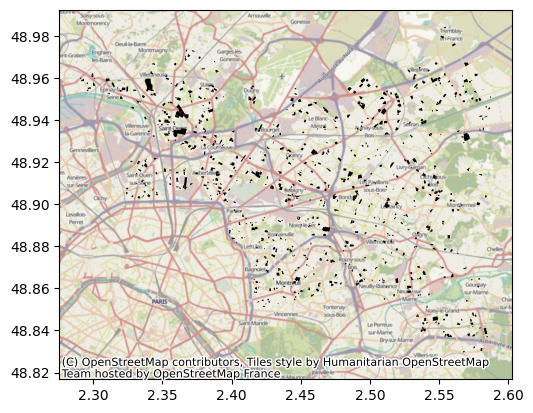

In [34]:
# Takes 10s on my laptop
bdedu = gpd.read_file(GPKG, layer="zone_d_activite_ou_d_interet")# toponymie_services_et_activites
print(len(bdedu),"items")
# Utilisons les memes projections
bdedu = bdedu.to_crs(4326) 
# Tri sur la catégorie d'intéret
bdedu = bdedu[bdedu["categorie"] == "Science et enseignement"] 
bdedu = gpd.sjoin(bdedu, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdedu),"items dans la zone")

fig, ax = plt.subplots()
bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()


In [35]:
bat_edu = gpd.sjoin(gpd.GeoDataFrame(bats[["cleabs","geometry","identifiants_rnb","materiaux_de_la_toiture","hauteur"]],geometry="geometry"), gpd.GeoDataFrame(bdedu[["cleabs","toponyme","geometry"]],geometry="geometry"), how='left').dropna(subset="toponyme")
bat_edu.head(3)

cleabs_left  \
1699  BATIMENT0000000002599800   
1771  BATIMENT0000000002600955   
1772  BATIMENT0000000002600963   

                                               geometry  \
1699  MULTIPOLYGON Z (((2.55395 48.98409 82.5, 2.553...   
1771  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.3772 ...   
1772  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.37734...   

               identifiants_rnb materiaux_de_la_toiture  hauteur  index_right  \
1699  A12MR4AER8XA/H3V9FEZVTCQH                    None      7.9       8101.0   
1771               GMKNQX3Q3AY4                    None     11.4       9799.0   
1772               FWK5CQ31Y968                             11.3       9799.0   

                  cleabs_right                         toponyme  
1699  SURFACTI0000000002555409  I.M.E. B. Guillez le Petit Orme  
1771  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin  
1772  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin

On peut aussi afficher les réseaux

/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying' not supported
  return ogr_read(
/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(256)' not supported
  return ogr_read(
/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(30)' not supported
  return ogr_read(
/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'timestamp with time zone' not supported
  return ogr_read(
/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg': 'troncon_de_route' (default), 'r

188015 items
68497 items


/tmp/ipykernel_273337/1883887287.py:9: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
/tmp/ipykernel_273337/1883887287.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


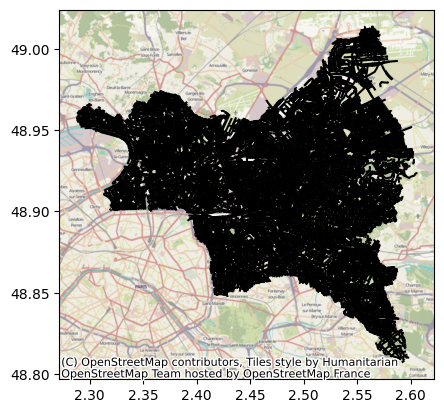

In [36]:
# Takes 80s on my laptop -- loading roads in this case
bdtopo = gpd.read_file(GPKG)
print(len(bdtopo),"items")
# Utilisons les memes projections
bdtopo = bdtopo.to_crs(4326)
bdtopo = gpd.sjoin(bdtopo, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdtopo),"items")
fig, ax = plt.subplots()
bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Dataset: parcellaire-express

In [37]:
# Takes 11s on my laptop
pci = gpd.read_file(DATA_FOLDER / "PARCELLAIRE-EXPRESS_1-1__SHP_LAMB93_D093_2024-10-01/PARCELLAIRE-EXPRESS/1_DONNEES_LIVRAISON_2024-11-00210/PEPCI_1-1_SHP_LAMB93_D093/BATIMENT.SHP")
print(len(pci),"items")
pci = pci.to_crs(4326)
pci = gpd.sjoin(pci, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(pci),"items - sorted")
pci.head(3)

376574 items
376220 items - sorted


TYPE                                           geometry  \
0  Construction légère  POLYGON ((2.39066 48.90535, 2.3907 48.90536, 2...   
1      Bâtiment en dur  POLYGON ((2.52665 48.87779, 2.52669 48.87777, ...   
2      Bâtiment en dur  POLYGON ((2.52583 48.87706, 2.52582 48.87706, ...   

   index_right code                nom  
0         93.0   93  Seine-Saint-Denis  
1         93.0   93  Seine-Saint-Denis  
2         93.0   93  Seine-Saint-Denis

# Etape 2: Exploration autour d'une école

## Etablissement d'une zone d'intérêt

In [38]:
pd.DataFrame(annuaire.iloc[0])

63
identifiant_de_l_etablissement                                               0932595R
nom_etablissement                   Ecole primaire La Roseraie - Jacqueline de Cha...
type_etablissement                                                              Ecole
statut_public_prive                                                            Public
adresse_1                                                                47 rue Pinel
...                                                                               ...
code_zone_animation_pedagogique                                                  None
libelle_zone_animation_pedagogique                                               None
code_bassin_formation                                                            None
libelle_bassin_formation                                                         None
geometry                                 POINT (2.3590491366730153 48.93021698801084)

[73 rows x 1 columns]

In [39]:
# Filtrons autour de d = 100m
d = 0.02 # échelle à retrouver
zone = annuaire.iloc[0].geometry.buffer(d)

## Clip des dataset pour rester léger

In [40]:
bdtopo_d = bdtopo[bdtopo.geometry.within(zone)].clip(zone)# check with within
pci_d = pci[pci.geometry.within(zone)].clip(zone)# check with within
bdedu_d = bdedu[bdedu.geometry.within(zone)].clip(zone)# check with within
bat_edu_d =  bat_edu[bat_edu.geometry.within(zone)].clip(zone)

/tmp/ipykernel_273337/3993707997.py:6: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
/tmp/ipykernel_273337/3993707997.py:7: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")


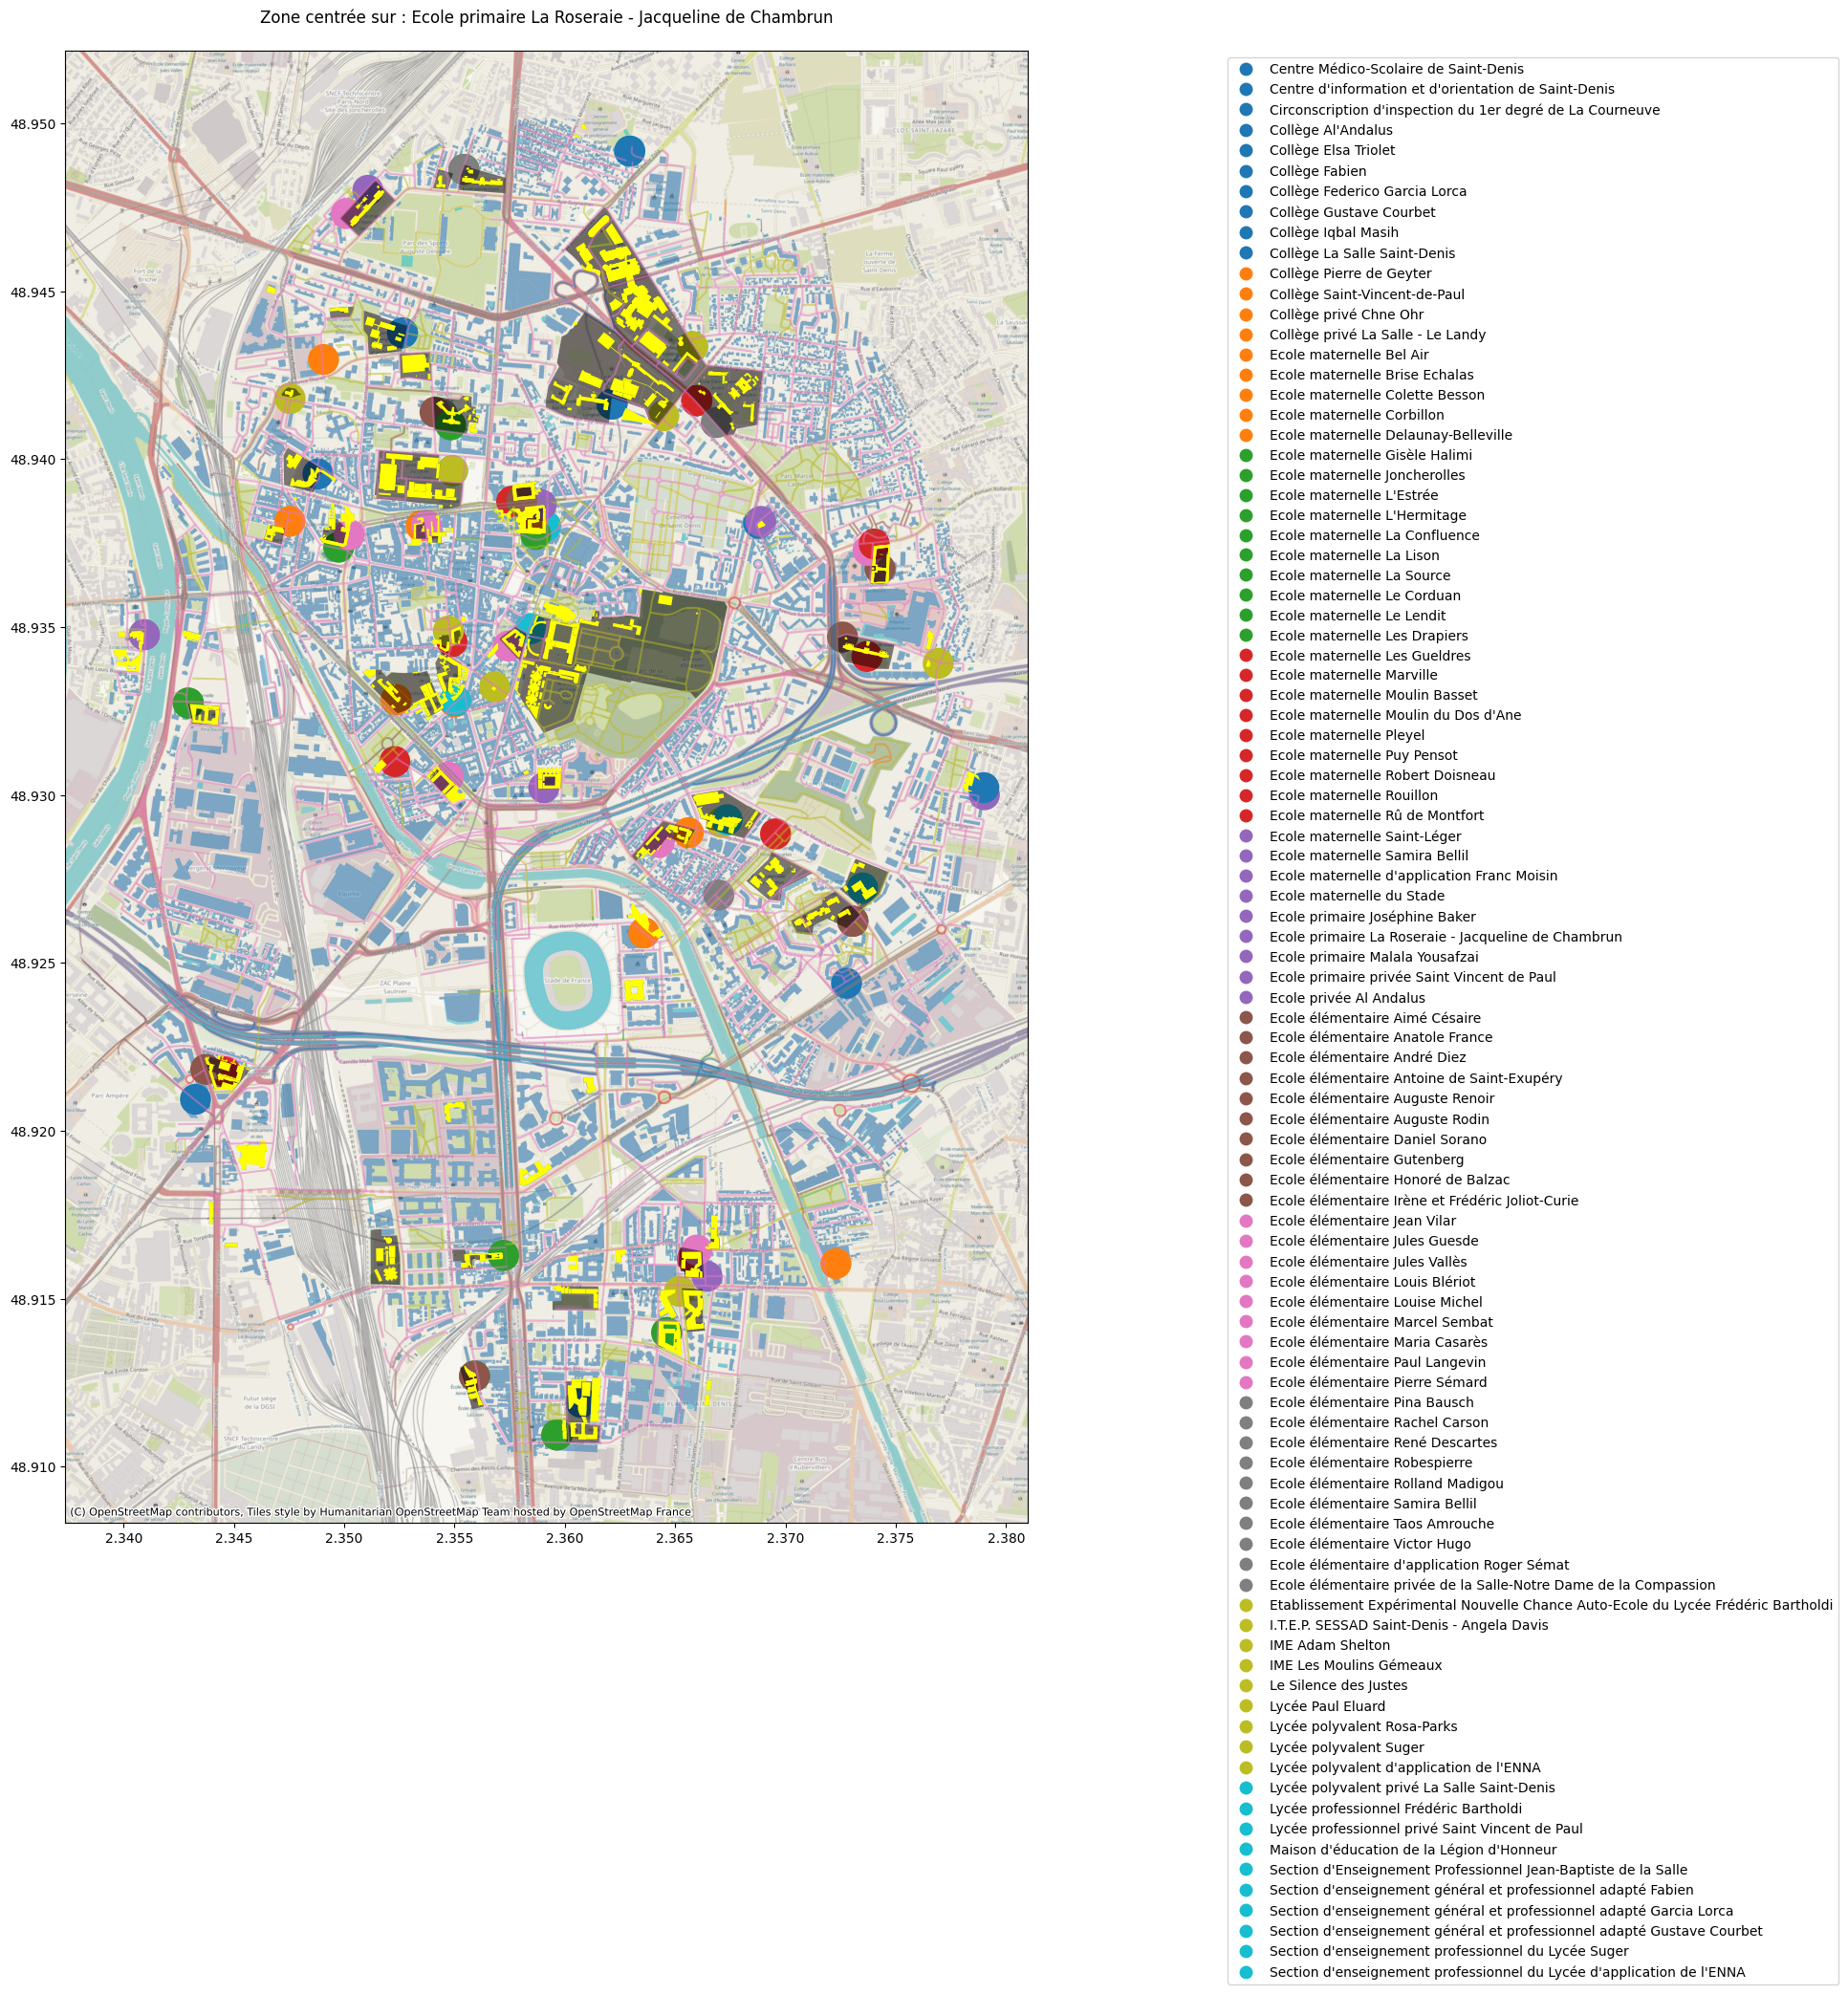

<Figure size 640x480 with 0 Axes>

In [41]:
#plots all dans la zone sélectionnée
fig, ax = plt.subplots(figsize=(20,20))
pci_d.plot(column="TYPE", legend=True, categorical = True, ax = ax, alpha=0.5)
bdtopo_d.plot(column="nature",legend=True, categorical = True, ax = ax, alpha=0.5)
annuaire[annuaire.geometry.within(zone)].clip(zone).plot(column = "nom_etablissement",legend=True, categorical = True, ax = ax, markersize=500, legend_kwds={'loc': 'upper left'})
bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")
cx.add_basemap(ax, crs=pci_d.crs, zoom=16) # source=cx.providers.OpenStreetMap.Mapnik,
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 0, 0, 1))
ax.set_title("Zone centrée sur : "+annuaire.iloc[0].nom_etablissement+"\n")
plt.show()
plt.savefig("preview_example.jpg")

# Etape 3: Travail au niveau d'une école spécifique

In [42]:
from shapely.ops import nearest_points

## Sélection de l'école et clip des datasets

In [43]:
# On s'intéresse à : bdedu_d, bat_edu_d
ecoles = annuaire[annuaire.geometry.within(zone)]
ecoles.head(3)

identifiant_de_l_etablissement  \
63                         0932595R   
8973                       0930150H   
8979                       0930210Y   

                                      nom_etablissement type_etablissement  \
63    Ecole primaire La Roseraie - Jacqueline de Cha...              Ecole   
8973                      Ecole élémentaire Victor Hugo              Ecole   
8979                       Ecole élémentaire André Diez              Ecole   

     statut_public_prive          adresse_1 adresse_2       adresse_3  \
63                Public       47 rue Pinel      None  93200 ST DENIS   
8973              Public  8 rue Jean Mermoz      None  93200 ST DENIS   
8979              Public   38 avenue Lénine      None  93200 ST DENIS   

     code_postal code_commune  nom_commune  ... code_type_contrat_prive  \
63         93200        93066  Saint-Denis  ...                      99   
8973       93200        93066  Saint-Denis  ...                      99   
8979       93200        93066  Saint-Denis  ...                      99   

          pial etablissement_mere  type_rattachement_etablissement_mere  \
63        None               None                                  None   
8973  0930587H               None                                  None   
8979      None               None                                  None   

      code_circonscription code_zone_animation_pedagogique  \
63                0932058G                            None   
8973              0932609F                            None   
8979              0932609F                            None   

     libelle_zone_animation_pedagogique code_bassin_formation  \
63                                 None                  None   
8973                               None                  None   
8979                               None                  None   

     libelle_bassin_formation                  geometry  
63                       None  POINT (2.35905 48.93022)  
8973                     None  POINT (2.35446 48.94132)  
8979                     None  POINT (2.36598 48.94175)  

[3 rows x 73 columns]

In [44]:
recollement = gpd.sjoin_nearest(ecoles, bdedu_d, distance_col="distances", lsuffix="e_", rsuffix="f_", exclusive=True)[["identifiant_de_l_etablissement","nom_etablissement","distances","toponyme","cleabs","nature","nature_detaillee"]]
recollement.head(3)

/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


identifiant_de_l_etablissement  \
63                         0932595R   
8973                       0930150H   
8979                       0930210Y   

                                      nom_etablissement  distances  \
63    Ecole primaire La Roseraie - Jacqueline de Cha...        0.0   
8973                      Ecole élémentaire Victor Hugo        0.0   
8979                       Ecole élémentaire André Diez        0.0   

                                     toponyme                    cleabs  \
63    Groupe Scolaire la Roseraie de Chambrun  SURFACTI0000000351259092   
8973            École Élémentaire Victor Hugo  SURFACTI0000000002555608   
8979        École Élémentaire Rolland Madigou  SURFACTI0000000002555602   

                     nature   nature_detaillee  
63    Enseignement primaire    Groupe scolaire  
8973  Enseignement primaire  Ecole élémentaire  
8979  Enseignement primaire  Ecole élémentaire

Et on essaye de bien vérifier que les écoles identifiées soient celles des zones identifiées, pour ca on vérifie la distance entre les écoles et les zones

Et on retire les matchs où la distance entre les deux points est trop grande

8.233389721918371e-05


<Axes: >

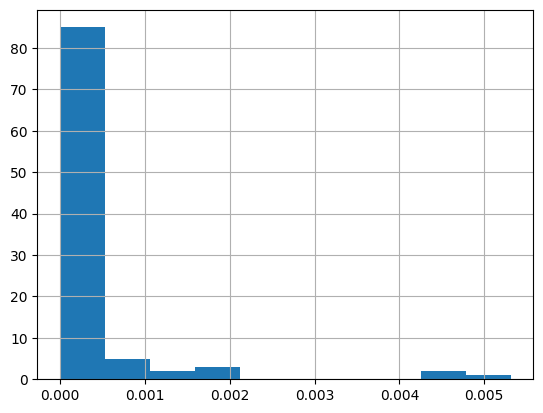

In [45]:
seuil_recol = recollement.distances.quantile(q=0.7)
print(seuil_recol)
recollement.distances.hist()

In [46]:
recollement = recollement[recollement.distances < seuil_recol]
bdedu_areas = recollement.toponyme.unique()
bdedu_r = bdedu[bdedu.toponyme.isin(bdedu_areas)]
recollement.head(3)

identifiant_de_l_etablissement  \
63                         0932595R   
8973                       0930150H   
8979                       0930210Y   

                                      nom_etablissement  distances  \
63    Ecole primaire La Roseraie - Jacqueline de Cha...        0.0   
8973                      Ecole élémentaire Victor Hugo        0.0   
8979                       Ecole élémentaire André Diez        0.0   

                                     toponyme                    cleabs  \
63    Groupe Scolaire la Roseraie de Chambrun  SURFACTI0000000351259092   
8973            École Élémentaire Victor Hugo  SURFACTI0000000002555608   
8979        École Élémentaire Rolland Madigou  SURFACTI0000000002555602   

                     nature   nature_detaillee  
63    Enseignement primaire    Groupe scolaire  
8973  Enseignement primaire  Ecole élémentaire  
8979  Enseignement primaire  Ecole élémentaire

## Création d'une liste école par école au sein de la zone définie à l'étape 2

/tmp/ipykernel_273337/564879362.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)


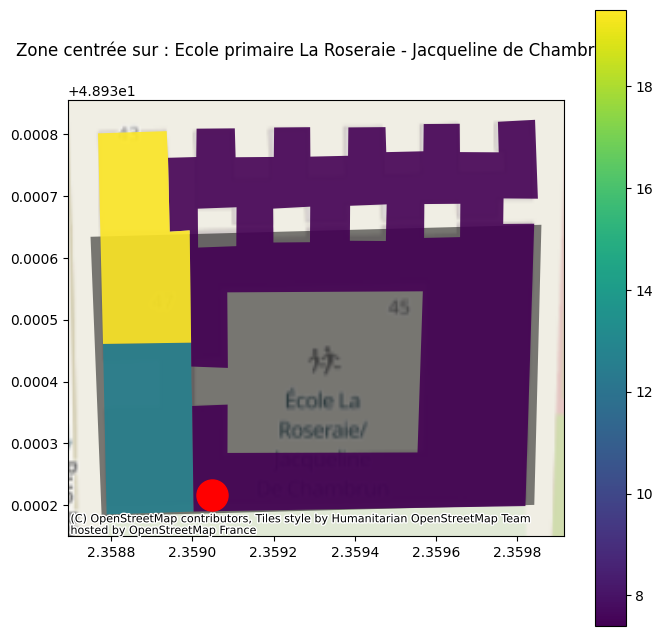

In [47]:
documentation = "# Example de liste d'écoles\n\n"

fullRun = False # Set true to to all all schools
if fullRun :
    ecoles_to_run = recollement["identifiant_de_l_etablissement"].unique()
else:
    ecoles_to_run = [recollement["identifiant_de_l_etablissement"].unique()[0]]
for id_ecole in ecoles_to_run:

    ecole = ecoles[ecoles.identifiant_de_l_etablissement == id_ecole]
    documentation +="## "+ecole.iloc[0]["nom_etablissement"]+"\n\n" + \
        "* Type etablissement: "+ecole.iloc[0]["type_etablissement"] +"\n"+ \
        "* adresse_1: "+ecole.iloc[0]["adresse_1"] +"\n"+ \
        "* nom_commune: "+ecole.iloc[0]["nom_commune"] +"\n"+ \
        "* identifiant_de_l_etablissement: "+ecole.iloc[0]["identifiant_de_l_etablissement"] +"\n"
    match = recollement[recollement.identifiant_de_l_etablissement == id_ecole]
    zone = ecole.iloc[0].geometry.buffer(0.01)
    bdedu_s = bdedu[bdedu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s = bat_edu[bat_edu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)
    geod = bat_edu_s.crs.get_geod()
    bat_edu_s["area_m2"] = bat_edu_s.geometry.apply(lambda g: abs(geod.geometry_area_perimeter(g)[0]))
    documentation += "* Surface totale: "+str(int(bat_edu_s.area_m2.sum())) +"m2\n\n"
    if os.path.isfile("images/"+id_ecole+".jpg"):
        pass
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
        bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
        ecole.plot(color="red", ax = ax, markersize=500)
        cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
        ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
        plt.savefig("images/"+id_ecole+".jpg")

    documentation += "### Image\n\n![]("+ecole.iloc[0]["identifiant_de_l_etablissement"]+".jpg)\n\n"
if not fullRun:
    fig, ax = plt.subplots(figsize=(8,8))
    bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
    bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
    ecole.plot(color="red", ax = ax, markersize=500)
    cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
    ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
else:
    with open("images/Readme.md", "w") as f:
        f.write(documentation)

# Etape 3: Intégration pour le d93 une source de donnée 'potentiel solaire"

* Provenance: https://data-iau-idf.opendata.arcgis.com/datasets/iau-idf::le-potentiel-solaire-des-toitures/

##  Préparation de la requete


On définit le périmètre de la zone d'intérêt avant d'aller demander les data

In [48]:
dfecole = pd.concat([bdedu_s,bat_edu_s,ecole])
gdf = gpd.GeoDataFrame(dfecole,geometry="geometry")
geo = ",".join([str(x) for x in gdf.total_bounds])
geo


'2.3587491817298756,48.930182216498395,2.3598599465495336,48.93082372213085'

On prend les données des batiments qui sont dans la box

In [49]:
import requests

requete_type = "https://geoweb.iau-idf.fr/agsmap1/rest/services/OPENDATA/OpendataIAU4/MapServer/26/query?where=1%3D1&outFields=*&geometry="+geo+"&geometryType=esriGeometryEnvelope&inSR=4326&spatialRel=esriSpatialRelIntersects&outSR=4326&f=json"

response = requests.get(requete_type) 


In [50]:
potentiel_batiment = pd.DataFrame([x["attributes"] for x in response.json()["features"]])
potentiel_batiment = potentiel_batiment[potentiel_batiment.id.isin(bat_edu_s.cleabs_left)]
bat_edu_p = bat_edu_s.merge(potentiel_batiment,how="left", left_on="cleabs_left", right_on="id")
bat_edu_p.head(3)

cleabs_left  \
0  BATIMENT0000000353684238   
1  BATIMENT0000000353684239   
2  BATIMENT0000000353684236   

                                            geometry  \
0  POLYGON Z ((2.35879 48.93018 42.8, 2.35878 48....   
1  POLYGON Z ((2.359 48.93019 38.7, 2.359 48.9303...   
2  POLYGON Z ((2.35878 48.93046 49.4, 2.35877 48....   

            identifiants_rnb materiaux_de_la_toiture  hauteur  index_right  \
0               9224MXJR8VQY                             12.6       9494.0   
1  8NQEJ4MCV81M/HTFYJNXKM2AM                    None      7.4       9494.0   
2  8X3PYCWJB2PW/J8CJH4PTF542                    None     19.5       9494.0   

               cleabs_right                                 toponyme  \
0  SURFACTI0000000351259092  Groupe Scolaire la Roseraie de Chambrun   
1  SURFACTI0000000351259092  Groupe Scolaire la Roseraie de Chambrun   
2  SURFACTI0000000351259092  Groupe Scolaire la Roseraie de Chambrun   

       area_m2  objectid  ...                      systeme protection  \
0   482.841189    256444  ...  thermique ou photovoltaïque          1   
1  2888.840308    256447  ...  thermique ou photovoltaïque          1   
2   545.962636    256442  ...  thermique ou photovoltaïque          1   

   mos2017  insee     moyenne2 forme     production mos17  st_area(shape)  \
0       62  93066  1197.290655  plat   14482.643275    14         482.790   
1       62  93066  1215.738207  plat  167496.434918    14        2888.535   
2       62  93066  1216.113110  plat   26927.371060    14         545.905   

   st_length(shape)  
0         92.709441  
1        552.333390  
2        108.120159  

[3 rows x 27 columns]

## Visualisation

Text(0.5, 1.0, "Zone centrée sur : Ecole primaire La Roseraie - Jacqueline de Chambrun\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")

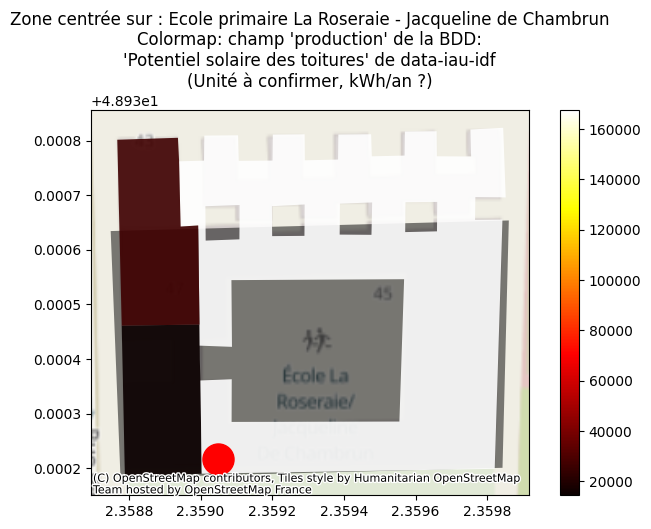

In [51]:
fig, ax = plt.subplots(figsize=(8,5))
bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_p.plot(column="production",legend=True, ax = ax, alpha=0.9,cmap="hot")
ecole.plot(color="red", ax = ax, markersize=500)
cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")

## Etape 4 : Ouverture de la db Gisement Solaire Brut au Bati 

In [52]:
# Takes some time 

potentiel_solaire = gpd.read_file(DATA_FOLDER / "potentiel-gisement-solaire-brut-au-bati.geojson").to_crs(4326)

In [53]:
potentiel_solaire.columns

Index(['geo_point_2d', 'geo_shape', 'objectid', 'n_sq_eb', 'n_sq_eb_or',
       'c_cainsee', 'm2_e_in700', 'm2_e_70_80', 'm2_e_80_90', 'm2_e_90_10',
       'm2_e_s1000', 'm2_e_tot', 'c_ens_moy', 'shape_leng', 'shape_area',
       'geometry'],
      dtype='object')

Number of buildings with missing solar data:
2


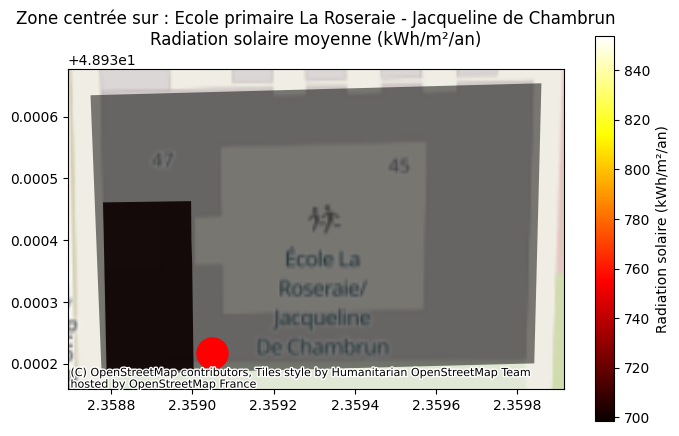

In [54]:
# Reset indices and ensure CRS match
bat_edu_s = bat_edu_s.reset_index(drop=True)
potentiel_solaire = potentiel_solaire.reset_index(drop=True)
bat_edu_s = bat_edu_s.to_crs(potentiel_solaire.crs)

# Perform spatial join with explicit suffixes
school_solar = gpd.sjoin(
    bat_edu_s, 
    potentiel_solaire, 
    how="left", 
    predicate="intersects",
    lsuffix='_left',
    rsuffix='_right'
)

print("Number of buildings with missing solar data:")
print(school_solar['c_ens_moy'].isna().sum())

fig, ax = plt.subplots(figsize=(8,5))
bdedu_s.plot(legend=True, categorical=True, ax=ax, color="black", alpha=0.5)

school_solar.plot(
    column="c_ens_moy",  # average solar radiation
    legend=True, 
    ax=ax, 
    alpha=0.9,
    cmap="hot",
    legend_kwds={'label': 'Radiation solaire (kWh/m²/an)'}
)

ecole.plot(color="red", ax=ax, markersize=500)
cx.add_basemap(ax, crs=pci_d.crs, zoom=18)
ax.set_title("Zone centrée sur : " + ecole.iloc[0].nom_etablissement + 
             "\nRadiation solaire moyenne (kWh/m²/an)")

plt.show()

## Impression des autres métriques de la db potentiel solaire 2

Liste des attributs : https://geocatalogue.apur.org/catalogue/srv/fre/catalog.search#/metadata/urn:apur:potentiel_gisement_solaire_brut_au_bati

In [55]:
# the specific school's data
school_data = school_solar.iloc[0]

print("Solar Potential Analysis for:", ecole.iloc[0].nom_etablissement)
print("-" * 50)

# building information
print("\nBuilding Surface Areas:")
print(f"Total roof surface: {school_data['m2_e_tot']:.0f} m²")
print("\nBreakdown by solar radiation level:")
print(f"- Excellent (>1000 kWh/m²/year): {school_data['m2_e_s1000']:.0f} m²")
print(f"- Very Good (900-1000 kWh/m²/year): {school_data['m2_e_90_10']:.0f} m²")
print(f"- Good (800-900 kWh/m²/year): {school_data['m2_e_80_90']:.0f} m²")
print(f"- Moderate (700-800 kWh/m²/year): {school_data['m2_e_70_80']:.0f} m²")
print(f"- Limited (<700 kWh/m²/year): {school_data['m2_e_in700']:.0f} m²")

print("\nAverage Solar Radiation:")
print(f"Mean radiation: {school_data['c_ens_moy']:.0f} kWh/m²/year")

# geometric information
print("\nGeometric Information:")
print(f"Building perimeter: {school_data['shape_leng']:.0f} meters")
print(f"Building footprint area: {school_data['shape_area']:.0f} m²")

# location information
print("\nLocation Information:")
print(f"Municipality code: {school_data['c_cainsee']:.0f}")
print(f"Building ID: {school_data['n_sq_eb']:.0f}")
print(f"Original Building ID: {school_data['n_sq_eb_or']:.0f}")

# calculate a metric
# TODO: This is not exhaustive, maybe we can also take into account very good and good radiations levels ?
if school_data['m2_e_tot'] > 0:
    optimal_percentage = (school_data['m2_e_s1000'] / school_data['m2_e_tot']) * 100
    print("\nDerived Metrics:")
    print(f"Percentage of optimal solar surface: {optimal_percentage:.1f}%")

Solar Potential Analysis for: Ecole primaire La Roseraie - Jacqueline de Chambrun
--------------------------------------------------

Building Surface Areas:
Total roof surface: 2 m²

Breakdown by solar radiation level:
- Excellent (>1000 kWh/m²/year): 0 m²
- Very Good (900-1000 kWh/m²/year): 0 m²
- Good (800-900 kWh/m²/year): 0 m²
- Moderate (700-800 kWh/m²/year): 1 m²
- Limited (<700 kWh/m²/year): 1 m²

Average Solar Radiation:
Mean radiation: 776 kWh/m²/year

Geometric Information:
Building perimeter: 17 meters
Building footprint area: 4 m²

Location Information:
Municipality code: nan
Building ID: 930306685
Original Building ID: 930306685

Derived Metrics:
Percentage of optimal solar surface: 0.0%
